In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from Tool_v1 import *

In [2]:
stock_name=["AAPL","GOOG","AMZN","TSLA","BABA","PTPI","BTCY",'FOX',"NVDA","DIS","NKE","XOM","KO",
            "2319.HK","0700.HK","1211.HK",'2318.HK','1448.HK','1810.HK',"3690.HK","2018.HK"]
start="2020-12-31"
#start="2022-12-31"
#start="2023-07-30"
end="2023-09-30"

In [3]:
vola_col=[]
print(len(stock_name))
for i in stock_name:
    stock_data = yf.download(i, start=start, end=end,progress=False)
    stock_data['Returns'] = stock_data['Close'].pct_change()
    # 计算波动性（每日收益率的标准差）
    volatility = np.std(stock_data['Returns']) * np.sqrt(252)  # 假设一年有252个交易日
    vola_col.append(volatility)
    print(f"{i}的波动性为：{volatility:.2%}")

21
AAPL的波动性为：28.66%
GOOG的波动性为：31.88%
AMZN的波动性为：38.01%
TSLA的波动性为：59.96%
BABA的波动性为：57.04%
PTPI的波动性为：263.15%
BTCY的波动性为：268.30%
FOX的波动性为：29.85%
NVDA的波动性为：54.37%
DIS的波动性为：30.29%
NKE的波动性为：33.12%
XOM的波动性为：30.84%
KO的波动性为：16.35%
2319.HK的波动性为：34.58%
0700.HK的波动性为：44.92%
1211.HK的波动性为：52.39%
2318.HK的波动性为：41.51%
1448.HK的波动性为：35.00%
1810.HK的波动性为：45.50%
3690.HK的波动性为：65.73%
2018.HK的波动性为：47.38%


[0.2865786658109962, 0.31878590261924183, 0.3801431742623765, 0.5995940954879718, 0.5703928805994403, 2.631481436642616, 2.683021400127463, 0.29849879223412734, 0.5437404127814767, 0.3029302352897981, 0.33124700726499, 0.3083591227745326, 0.16351752818508372, 0.34580610363020325, 0.4491780955174761, 0.523943245467487, 0.41505260754982665, 0.3500030556319343, 0.45501131688446944, 0.6572890620433895, 0.47377458290127533]


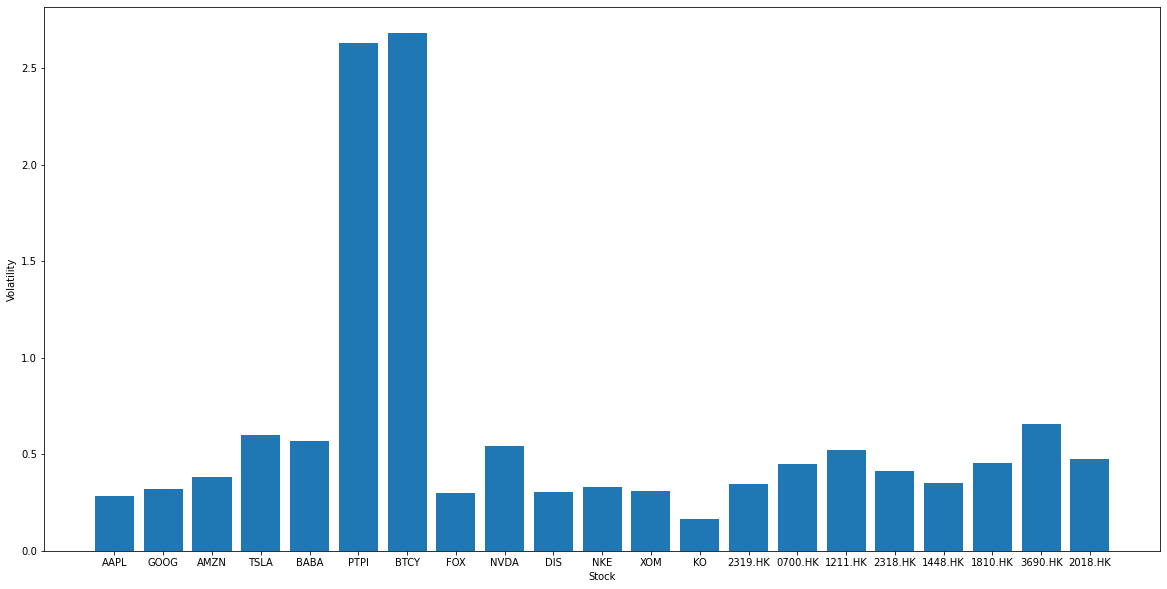

In [4]:
print(vola_col)
plt.figure(figsize=(20, 10))
plt.bar(stock_name, vola_col)


plt.xlabel('Stock')
plt.ylabel('Volatility')

plt.savefig('Volatility.png')
# 显示图形
plt.show()

In [5]:


rate_col1=[]
#MACD
for i in stock_name:
    stock_data=pct_change(i,start,end)
    stock_data=stock_data.copy()
    stock_data=MACD(stock_data)
    
    rate, holding, strategy = revenue(stock_data)
    rate_col1.append(rate[0])
    print("Stock_name: ",i," Predicition rate:{:.5f} ".format(rate[0])," holding return:{:.6f} ".format(holding[0])," MACD return:{:.6f} ".format(strategy[0]))
    if holding> strategy:
        print("better holding")
    else:
        print("better follow strategy")
    print()

Stock_name:  AAPL  Predicition rate:0.51594   holding return:0.254875   MACD return:0.445101 
better follow strategy

Stock_name:  GOOG  Predicition rate:0.48841   holding return:0.408952   MACD return:0.024172 
better holding

Stock_name:  AMZN  Predicition rate:0.49565   holding return:-0.247676   MACD return:-0.031388 
better follow strategy

Stock_name:  TSLA  Predicition rate:0.52174   holding return:0.061805   MACD return:0.709975 
better follow strategy

Stock_name:  BABA  Predicition rate:0.50000   holding return:-0.986964   MACD return:-0.224868 
better follow strategy

Stock_name:  PTPI  Predicition rate:0.47826   holding return:-3.236068   MACD return:-2.326779 
better follow strategy

Stock_name:  BTCY  Predicition rate:0.46377   holding return:1.064617   MACD return:-0.248853 
better holding

Stock_name:  FOX  Predicition rate:0.47391   holding return:0.000000   MACD return:-0.043950 
better holding

Stock_name:  NVDA  Predicition rate:0.50145   holding return:1.203567   M

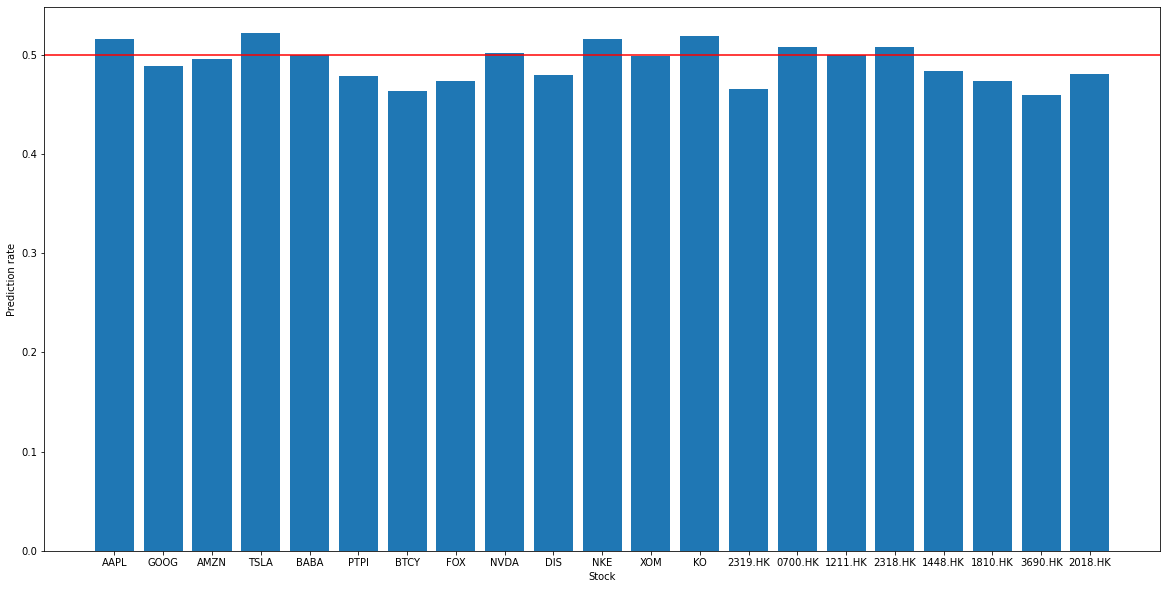

In [6]:
plt.figure(figsize=(20, 10))
plt.bar(stock_name, rate_col1)

plt.axhline(y=0.5, color='red')
# 添加标签和标题
plt.xlabel('Stock')
plt.ylabel('Prediction rate')

plt.savefig('MACD_bar.png')
# 显示图形
plt.show()

In [7]:
rate_col2=[]
#MACD_short
for i in stock_name:
    stock_data=pct_change(i,start,end)
    stock_data=stock_data.copy()
    stock_data=MACD_short(stock_data)
    
    rate, holding, strategy = revenue(stock_data)
    rate_col2.append(rate[0])
    print("Stock_name: ",i," Predicition rate:{:.5f} ".format(rate[0])," holding return:{:.6f} ".format(holding[0])," MACD return:{:.6f} ".format(strategy[0]))
    if holding> strategy:
        print("better holding")
    else:
        print("better follow strategy")
    print()

Stock_name:  AAPL  Predicition rate:0.49565   holding return:0.254875   MACD return:0.290420 
better follow strategy

Stock_name:  GOOG  Predicition rate:0.49420   holding return:0.408952   MACD return:-0.037504 
better holding

Stock_name:  AMZN  Predicition rate:0.50000   holding return:-0.247676   MACD return:0.060834 
better follow strategy

Stock_name:  TSLA  Predicition rate:0.53043   holding return:0.061805   MACD return:1.017858 
better follow strategy

Stock_name:  BABA  Predicition rate:0.49855   holding return:-0.986964   MACD return:-0.228168 
better follow strategy

Stock_name:  PTPI  Predicition rate:0.48116   holding return:-3.236068   MACD return:-0.018961 
better follow strategy

Stock_name:  BTCY  Predicition rate:0.46812   holding return:1.064617   MACD return:-0.166916 
better holding

Stock_name:  FOX  Predicition rate:0.47971   holding return:0.000000   MACD return:-0.105568 
better holding

Stock_name:  NVDA  Predicition rate:0.50725   holding return:1.203567   M

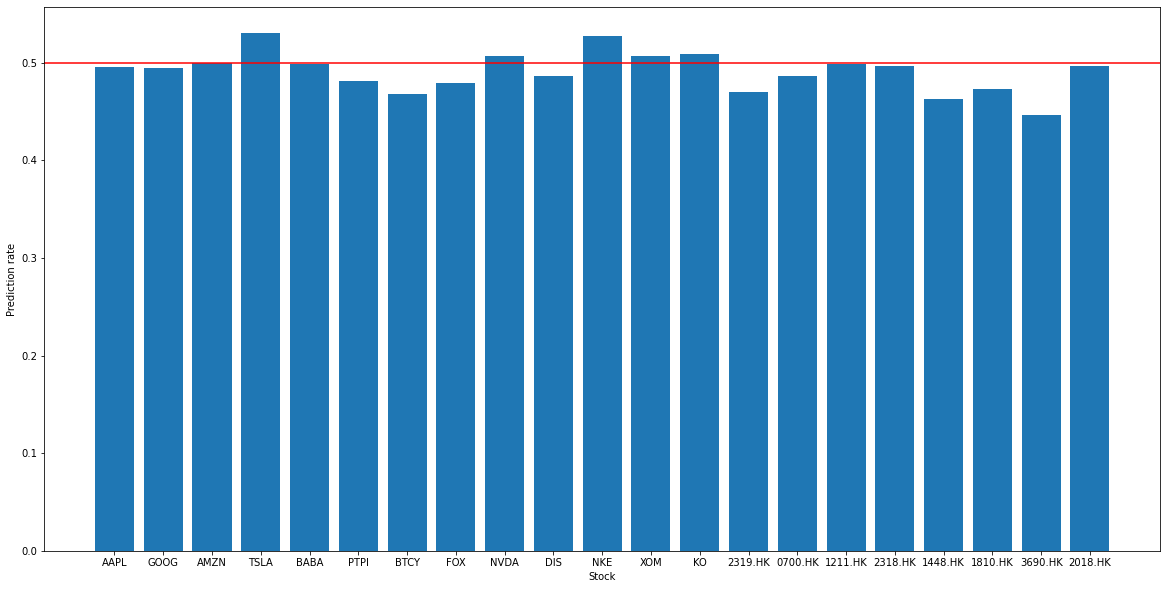

In [8]:
plt.figure(figsize=(20, 10))
plt.bar(stock_name, rate_col2)

plt.axhline(y=0.5, color='red')
# 添加标签和标题
plt.xlabel('Stock')
plt.ylabel('Prediction rate')

plt.savefig('MACD_short_bar.png')
# 显示图形
plt.show()

In [9]:
rate_col3=[]
#MACD_long
for i in stock_name:
    stock_data=pct_change(i,start,end)
    stock_data=stock_data.copy()
    stock_data=MACD_long(stock_data)
    
    rate, holding, strategy = revenue(stock_data)
    rate_col3.append(rate[0])
    print("Stock_name: ",i," Predicition rate:{:.5f} ".format(rate[0])," holding return:{:.6f} ".format(holding[0])," MACD return:{:.6f} ".format(strategy[0]))
    if holding> strategy:
        print("better holding")
    else:
        print("better follow strategy")
    print()

Stock_name:  AAPL  Predicition rate:0.50870   holding return:0.254875   MACD return:0.300362 
better follow strategy

Stock_name:  GOOG  Predicition rate:0.49420   holding return:0.408952   MACD return:0.123962 
better holding

Stock_name:  AMZN  Predicition rate:0.49565   holding return:-0.247676   MACD return:0.045440 
better follow strategy

Stock_name:  TSLA  Predicition rate:0.51884   holding return:0.061805   MACD return:0.711952 
better follow strategy

Stock_name:  BABA  Predicition rate:0.48406   holding return:-0.986964   MACD return:-0.817473 
better follow strategy

Stock_name:  PTPI  Predicition rate:0.46087   holding return:-3.236068   MACD return:-3.259950 
better holding

Stock_name:  BTCY  Predicition rate:0.46232   holding return:1.064617   MACD return:-0.252777 
better holding

Stock_name:  FOX  Predicition rate:0.48841   holding return:0.000000   MACD return:0.275666 
better follow strategy

Stock_name:  NVDA  Predicition rate:0.49275   holding return:1.203567   MAC

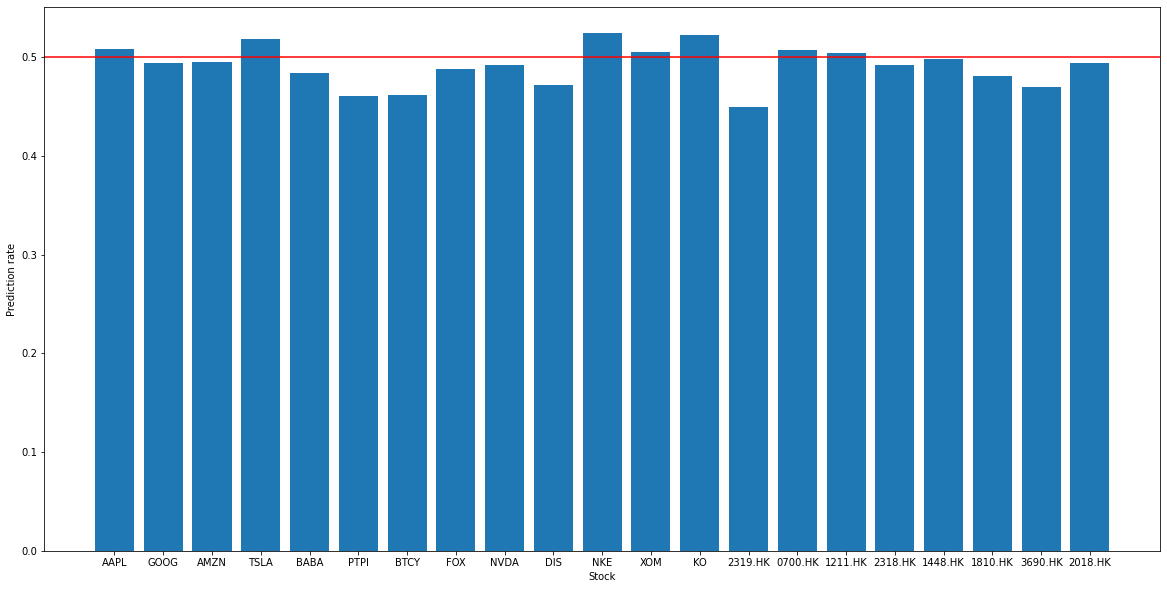

In [10]:
plt.figure(figsize=(20, 10))
plt.bar(stock_name, rate_col3)

plt.axhline(y=0.5, color='red')
# 添加标签和标题
plt.xlabel('Stock')
plt.ylabel('Prediction rate')

plt.savefig('MACD_long_bar.png')
# 显示图形
plt.show()

In [11]:
print(len(rate_col3))

21


In [12]:
i=0
macd_col=[]
macd_shortcol=[]
macd_longcol=[]

while i<len(stock_name):
    macd=rate_col1[i] 
    macd_short=rate_col2[i]
    macd_long=rate_col3[i]
    
    max_value=max(macd,macd_long,macd_short)
    if max_value==macd:
        macd_col.append([stock_name[i],"macd",macd])
    elif max_value==macd_long:
        macd_longcol.append([stock_name[i],"macd_long",macd_long])
    elif max_value==macd_short:
        macd_shortcol.append([stock_name[i],"macd_short",macd_short])
    i+=1
    
print(macd_col)
print(macd_longcol)
print(macd_shortcol)
print(len(macd_col)+len(macd_longcol)+len(macd_shortcol))
    


[['AAPL', 'macd', 0.5159420289855072], ['BABA', 'macd', 0.5], ['0700.HK', 'macd', 0.5074404761904762], ['2318.HK', 'macd', 0.5074404761904762]]
[['GOOG', 'macd_long', 0.49420289855072463], ['FOX', 'macd_long', 0.48840579710144927], ['KO', 'macd_long', 0.5231884057971015], ['1211.HK', 'macd_long', 0.5044642857142857], ['1448.HK', 'macd_long', 0.49851190476190477], ['1810.HK', 'macd_long', 0.4806547619047619], ['3690.HK', 'macd_long', 0.47023809523809523]]
[['AMZN', 'macd_short', 0.5], ['TSLA', 'macd_short', 0.5304347826086957], ['PTPI', 'macd_short', 0.4811594202898551], ['BTCY', 'macd_short', 0.4681159420289855], ['NVDA', 'macd_short', 0.5072463768115942], ['DIS', 'macd_short', 0.48695652173913045], ['NKE', 'macd_short', 0.527536231884058], ['XOM', 'macd_short', 0.5072463768115942], ['2319.HK', 'macd_short', 0.47023809523809523], ['2018.HK', 'macd_short', 0.49702380952380953]]
21


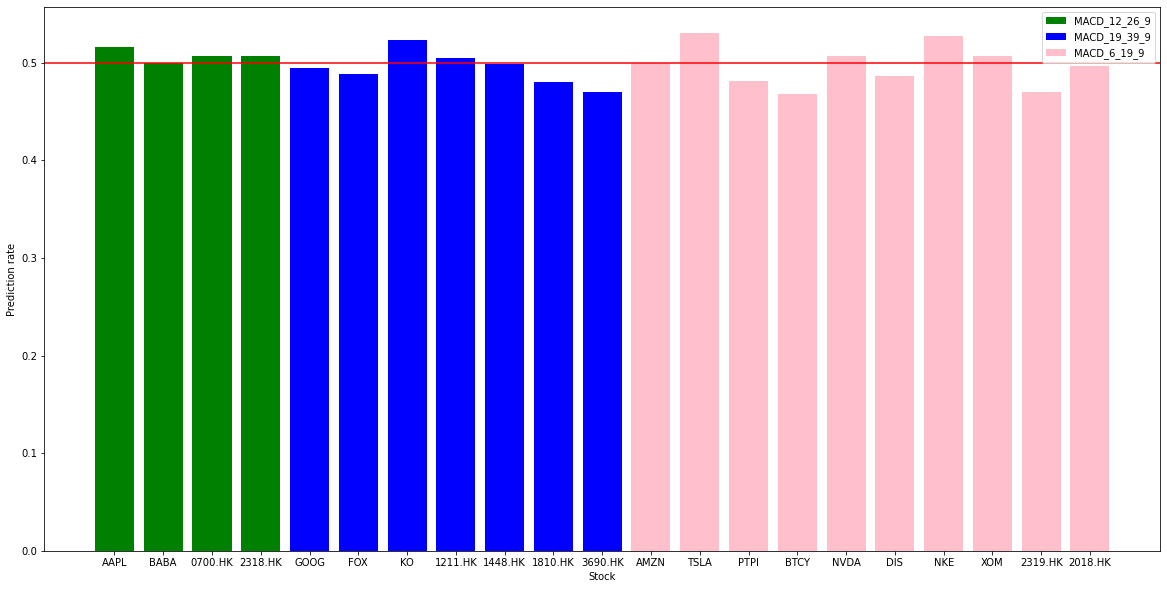

In [13]:

plt.figure(figsize=(20, 10))

i=0
while i<len(macd_col):
    if i==len(macd_col)-1:
        plt.bar(macd_col[i][0],macd_col[i][2],color="green",label="MACD_12_26_9")
        break
    plt.bar(macd_col[i][0],macd_col[i][2],color="green")
    i+=1
    
j=0
while j<len(macd_longcol):
    if j==len(macd_longcol)-1:
        plt.bar(macd_longcol[j][0],macd_longcol[j][2],color="blue",label="MACD_19_39_9")
        break
    plt.bar(macd_longcol[j][0],macd_longcol[j][2],color="blue")
    j+=1
    
k=0
while k<len(macd_shortcol):
    if k==len(macd_shortcol)-1:
        plt.bar(macd_shortcol[k][0],macd_shortcol[k][2],color="pink",label="MACD_6_19_9")
        break
    plt.bar(macd_shortcol[k][0],macd_shortcol[k][2],color="pink")
    k+=1
    



plt.legend()

plt.axhline(y=0.5, color='red')
# 添加标签和标题
plt.xlabel('Stock')
plt.ylabel('Prediction rate')

#plt.savefig('MACD_20201231.png')
#plt.savefig('MACD_20221231.png')
#plt.savefig('MACD_20230730.png')

# 显示图形
plt.show()

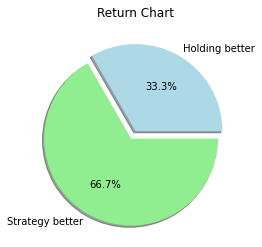

In [16]:
labels = ['Holding better','Strategy better']
sizes = [7/21,14/21]

# 饼图的颜色
colors = ['lightblue', 'lightgreen']

# 突出显示某个扇区（可选）
explode = (0, 0.1)

# 创建饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

# 添加标题
plt.title('Return Chart')
plt.savefig('return.png')
# 显示图形
plt.show()